In [125]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn import preprocessing
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import pydotplus 
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

In [126]:
missing_values = [" ?"]
german_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data',header=None, sep = " ", na_values = missing_values)
german_data.columns = ['chk_status', 'mth_dur', 'credit_his', 'purpose', 'credit_amt', 'svgs_acct', 'emp_since', 'inst_rate', 'personal_status_sex', 'guarantors', 'current_res', 'property', 'age', 'inst_plans', 'housing', 'existing_credits', 'job', 'liable_people', 'telephone', 'foreign_worker', 'class']
german_data.head()

,chk_status,mth_dur,credit_his,purpose,credit_amt,svgs_acct,emp_since,inst_rate,personal_status_sex,guarantors,...,property,age,inst_plans,housing,existing_credits,job,liable_people,telephone,foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## HOLDOUT

In [127]:
le = LabelEncoder()
Y = german_data['class']
X = german_data.drop(['class'], axis=1)
g_accuracy, g_precision, g_fMeasure = [], [], []

for columns in X:
    X[columns] = le.fit_transform(X[columns])

for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.9)
    german_clf = tree.DecisionTreeClassifier()
    german_clf = german_clf.fit(x_train, y_train)
    pred_y = german_clf.predict(x_test)
    g_accuracy.append(accuracy_score(y_test, pred_y))
    g_precision.append(precision_score(y_test, pred_y))
    g_fMeasure.append(f1_score(y_test, pred_y))
    print('Accuracy on test data is %.2f' % (accuracy_score(y_test, pred_y)))
    print('Precision on test data is %.2f' % (precision_score(y_test, pred_y)))
    print('F-measure on test data is %.2f' % (f1_score(y_test, pred_y)))
    print(f'--- Round {i}')
    print('\n')

Accuracy on test data is 0.69
Precision on test data is 0.84
F-measure on test data is 0.77
--- Round 0


Accuracy on test data is 0.66
Precision on test data is 0.77
F-measure on test data is 0.76
--- Round 1


Accuracy on test data is 0.76
Precision on test data is 0.81
F-measure on test data is 0.83
--- Round 2


Accuracy on test data is 0.71
Precision on test data is 0.81
F-measure on test data is 0.79
--- Round 3


Accuracy on test data is 0.66
Precision on test data is 0.76
F-measure on test data is 0.77
--- Round 4




In [128]:
g_accuracy.append(sum(g_accuracy)/len(g_accuracy))
g_precision.append(sum(g_precision)/len(g_precision))
g_fMeasure.append(sum(g_fMeasure)/len(g_fMeasure))

print('Average accuracy on test data is %.2f' % (g_accuracy[-1]))
print('Average precision on test data is %.2f' % (g_precision[-1]))
print('Average f-measure on test data is %.2f' % (g_fMeasure[-1]))
print('------')

Average accuracy on test data is 0.70
Average precision on test data is 0.80
Average f-measure on test data is 0.78
------


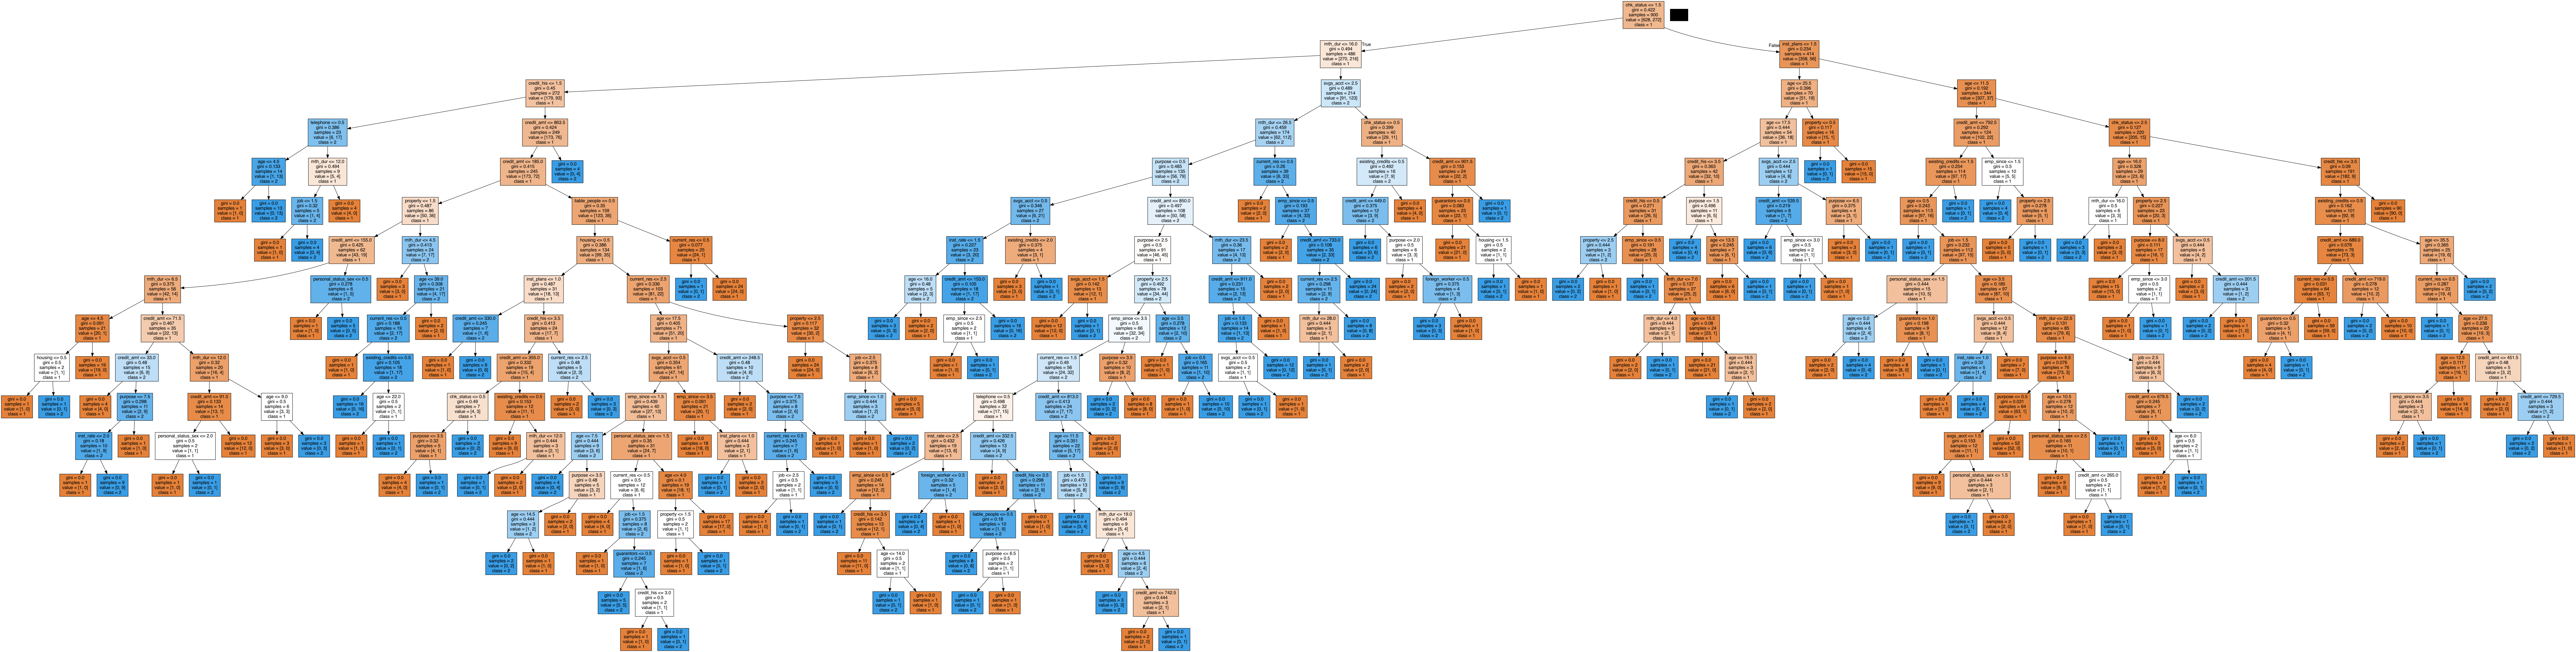

In [129]:
dot_data = tree.export_graphviz(german_clf, feature_names=X.columns, class_names=["1", "2"], filled=True, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [130]:
gd = {'Accuracy': g_accuracy, 'Precision': g_precision, 'F-measure': g_fMeasure}
german_df = pd.DataFrame(data=gd, index=['1', '2', '3', '4', '5', 'Average'])
german_df

,Accuracy,Precision,F-measure
1,0.690,0.838710,0.770370
2,0.660,0.768116,0.757143
3,0.760,0.805556,0.828571
4,0.710,0.805970,0.788321
5,0.660,0.756757,0.767123
Average,0.696,0.795022,0.782306


<BarContainer object of 6 artists>

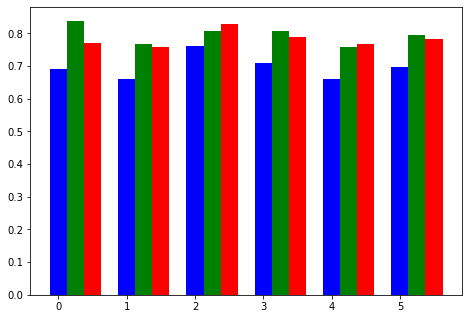

In [131]:
data = [g_accuracy, g_precision, g_fMeasure]
german_bars = np.arange(6)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(german_bars + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(german_bars + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(german_bars + 0.50, data[2], color = 'r', width = 0.25)

## CROSS-VALIDATION

In [132]:
g_acc, g_pre, g_f1s = [], [], []

german_clf = tree.DecisionTreeClassifier()
gcv = cross_validate(german_clf, X, Y, cv=10, scoring=('accuracy', 'precision', 'f1'))

gcv_acc = gcv['test_accuracy'].tolist()
gcv_pre = gcv['test_precision'].tolist()
gcv_f1s = gcv['test_f1'].tolist()
cv_acc_german_reg = gcv_acc
gcv_acc.append(sum(gcv_acc) / len(gcv_acc))
gcv_pre.append(sum(gcv_pre) / len(gcv_pre))
gcv_f1s.append(sum(gcv_f1s) / len(gcv_f1s))
print("Accuracy")
print(gcv_acc)
print("Precision")
print(gcv_pre)
print("F-measure")
print(gcv_f1s)

Accuracy
[0.64, 0.65, 0.76, 0.71, 0.66, 0.66, 0.7, 0.71, 0.66, 0.72, 0.687]
Precision
[0.7931034482758621, 0.7692307692307693, 0.8194444444444444, 0.8059701492537313, 0.7571428571428571, 0.7571428571428571, 0.8225806451612904, 0.7971014492753623, 0.7647058823529411, 0.7916666666666666, 0.7878089168946782]
F-measure
[0.71875, 0.7407407407407408, 0.8309859154929577, 0.7883211678832117, 0.7571428571428571, 0.7571428571428571, 0.7727272727272727, 0.7913669064748201, 0.7536231884057971, 0.8028169014084506, 0.7713617807418964]


In [133]:
gcvd = {'Accuracy': gcv_acc, 'Precision': gcv_pre, 'F-measure': gcv_f1s}
gcv_df = pd.DataFrame(data=gcvd, index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Average'])
gcv_df

,Accuracy,Precision,F-measure
1,0.640,0.793103,0.718750
2,0.650,0.769231,0.740741
3,0.760,0.819444,0.830986
4,0.710,0.805970,0.788321
5,0.660,0.757143,0.757143
6,0.660,0.757143,0.757143
7,0.700,0.822581,0.772727
8,0.710,0.797101,0.791367
9,0.660,0.764706,0.753623
10,0.720,0.791667,0.802817


<BarContainer object of 11 artists>

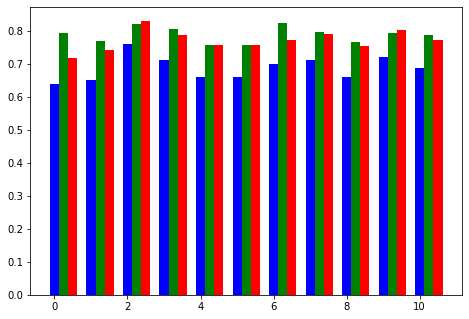

In [134]:
data = [gcv_acc, gcv_pre, gcv_f1s]
german_bars = np.arange(11)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(german_bars + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(german_bars + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(german_bars + 0.50, data[2], color = 'r', width = 0.25)